# Trapping Rain Water  (Hard)
- 코드출처: 파이썬 알고리즘 인터뷰 (by 박상길)

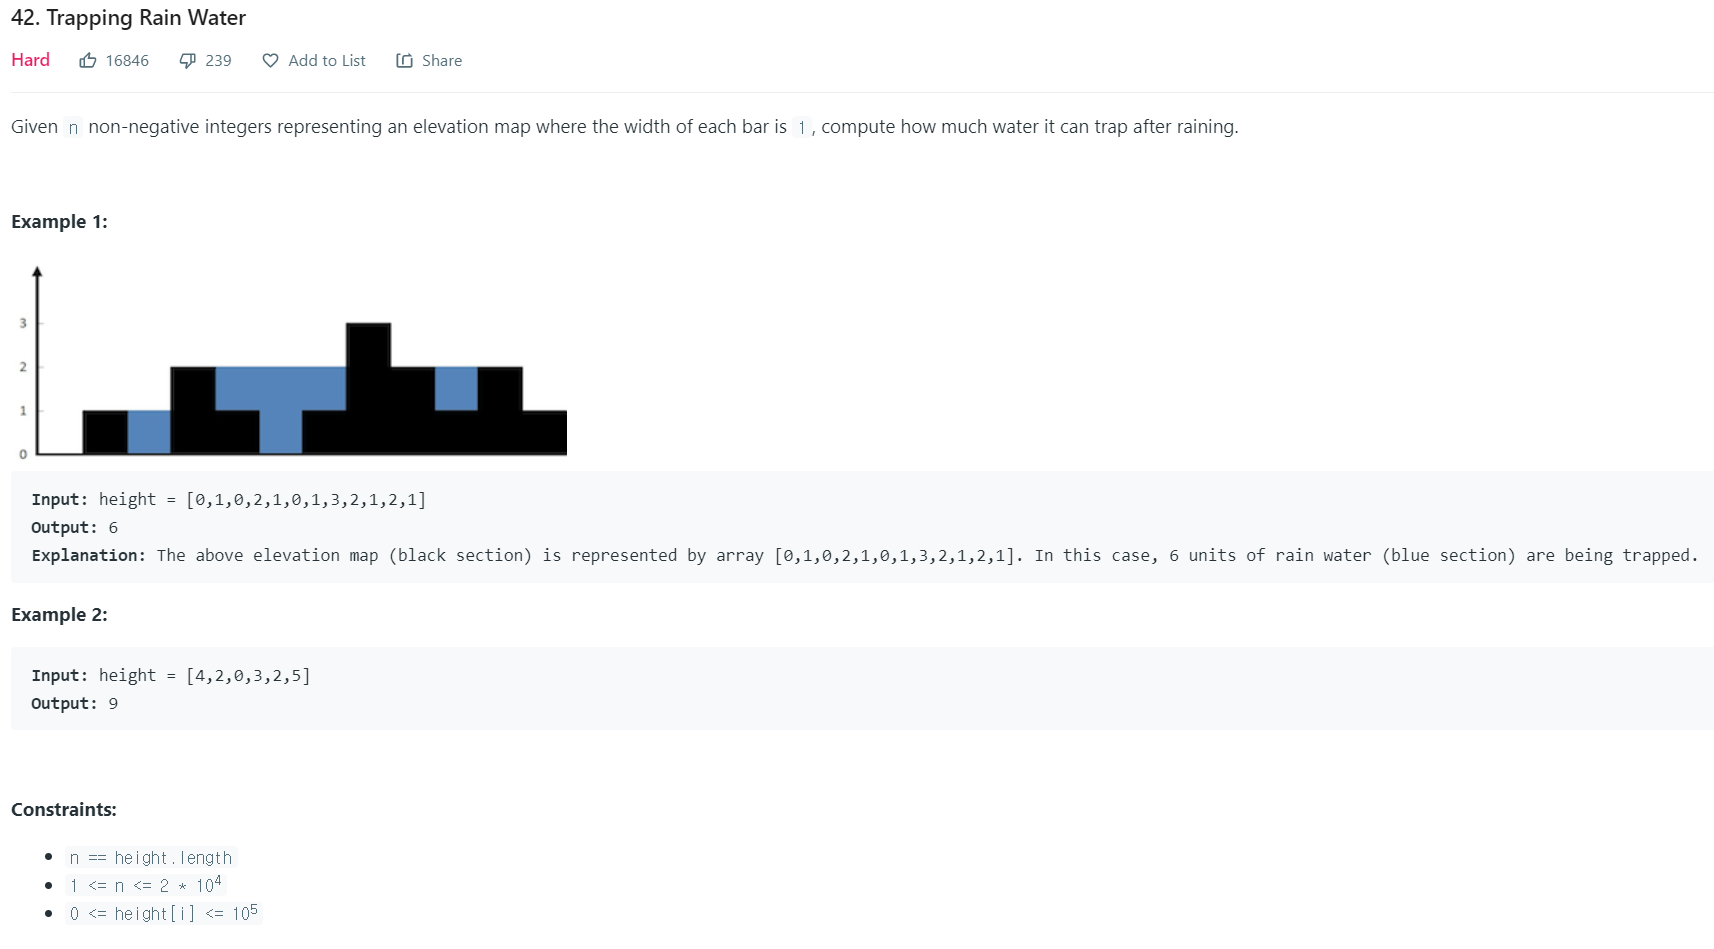

In [1]:
from IPython.display import Image
Image("./문제설명.png")

## 투 포인터를 최대로 이동

In [2]:
def trap(height):
    if not height:
        return 0
    
    volume = 0
    left, right = 0, len(height) - 1
    left_max, right_max = height[left], height[right]
    
    while left < right:
        left_max, right_max = max(height[left], left_max), max(height[right], right_max)
        # 더 높은 쪽을 향해 투 포인터 이용
        if left_max <= right_max:
            volume += left_max - height[left]
            left += 1
        else:
            volume += right_max - height[right]
            right -= 1
    
    return volume

In [3]:
print(trap([0,1,0,2,1,0,1,3,2,1,2,1]))
print(trap([4,2,0,3,2,5]))

6
9


## 스택 쌓기

In [4]:
def trap(height):
    stack = []
    volume = 0
    
    for i in range(len(height)):
        # 변곡점을 만나는 경우
        while stack and height[i] > height[stack[-1]]:
            # 스택에서 꺼낸다
            top = stack.pop()
            
            if not len(stack):
                break
                
            # 이전과의 차이만큼 물 높이 처리
            distance = i - stack[-1] - 1
            waters = min(height[i], height[stack[-1]]) - height[top]
            
            volume += distance * waters
            
        stack.append(i)
    return volume

In [5]:
print(trap([0,1,0,2,1,0,1,3,2,1,2,1]))
print(trap([4,2,0,3,2,5]))

6
9
